In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, ConfusionMatrixDisplay
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import randint
from collections import Counter
from imblearn.under_sampling import OneSidedSelection
from imblearn.over_sampling import RandomOverSampler



In [15]:
df = pd.read_csv("./us_accidents_road_data.csv", index_col=0)
df = df.sample(n = 400000)
df.head()


,ID,Severity,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
1468728,A-1468729,2,False,False,False,False,True,False,False,False,False,False,False,False,False
296769,A-296770,2,False,False,False,False,False,False,False,False,False,False,False,False,False
2386600,A-2386601,2,False,False,False,False,False,False,False,False,False,False,False,False,False
1148683,A-1148684,2,False,False,False,False,True,False,False,False,False,False,False,False,False
2127536,A-2127537,2,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
x = df.drop(['Severity', 'ID'], axis=1)
y = df["Severity"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

In [17]:
# #****UNDER SAMPLING CODE SNIPPET
# # Summarize class distribution.
# print("Before undersampling: ", Counter(y_train))
# # #
# undersample = OneSidedSelection(n_jobs=-1)
# x_train, y_train = undersample.fit_resample(x_train, y_train)
# #
# # Summarize new class distribution.
# print("After undersampling: ", Counter(y_train))
# print("test: ", Counter(y_test))

In [18]:
# Summarize class distribution.
# print("Before oversampling: ",Counter(y_train))
# #
# ros = RandomOverSampler()
# x_train, y_train = ros.fit_resample(x_train, y_train)
# #
# # Summarize new class distribution.
# print("After oversampling: ", Counter(y_train))


In [19]:
accuracies = []

# Get results for various k values.
for i in range(1, 11):
    # Build the KNN classifier.
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)


    # Calculate model metrics.
    model_accuracy = accuracy_score(y_test, y_pred)
    model_precision = precision_score(y_test, y_pred, average = None)
    model_recall = recall_score(y_test, y_pred, average = None)
    model_f1 = f1_score(y_test, y_pred, average = None)

    accuracies.append(model_accuracy)

    print("\nNearest Neigbors:", i)
    print("Accuracy:", model_accuracy)
    print("Precision:", model_precision)
    print("Recall:", model_recall)
    print("f1 score:", model_f1)


c:\Users\Me\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Nearest Neigbors: 1
Accuracy: 0.866
Precision: [0.         0.89063016 0.07002801 0.10526316]
Recall: [0.         0.97314348 0.03551136 0.00346021]
f1 score: [0.         0.93006029 0.04712535 0.00670017]


c:\Users\Me\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Nearest Neigbors: 2
Accuracy: 0.8868
Precision: [0.         0.88764315 0.09090909 0.        ]
Recall: [0.         0.99891853 0.00142045 0.        ]
f1 score: [0.         0.93999915 0.0027972  0.        ]

Nearest Neigbors: 3
Accuracy: 0.86864
Precision: [0.10416667 0.89061728 0.16666667 0.        ]
Recall: [0.28688525 0.97521629 0.00284091 0.        ]
f1 score: [0.15283843 0.93099888 0.00558659 0.        ]


c:\Users\Me\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Nearest Neigbors: 4
Accuracy: 0.8696
Precision: [0.10542169 0.89058775 0.33333333 0.        ]
Recall: [0.28688525 0.97638789 0.00142045 0.        ]
f1 score: [0.15418502 0.93151627 0.00282885 0.        ]


c:\Users\Me\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Nearest Neigbors: 5
Accuracy: 0.86968
Precision: [0.10542169 0.89059675 0.5        0.        ]
Recall: [0.28688525 0.97647801 0.00142045 0.        ]
f1 score: [0.15418502 0.9315622  0.00283286 0.        ]


c:\Users\Me\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Nearest Neigbors: 6
Accuracy: 0.88768
Precision: [0.      0.88768 0.      0.     ]
Recall: [0. 1. 0. 0.]
f1 score: [0.         0.94049839 0.         0.        ]


c:\Users\Me\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Nearest Neigbors: 7
Accuracy: 0.88768
Precision: [0.      0.88768 0.      0.     ]
Recall: [0. 1. 0. 0.]
f1 score: [0.         0.94049839 0.         0.        ]


c:\Users\Me\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Nearest Neigbors: 8
Accuracy: 0.88768
Precision: [0.      0.88768 0.      0.     ]
Recall: [0. 1. 0. 0.]
f1 score: [0.         0.94049839 0.         0.        ]


c:\Users\Me\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Nearest Neigbors: 9
Accuracy: 0.88768
Precision: [0.      0.88768 0.      0.     ]
Recall: [0. 1. 0. 0.]
f1 score: [0.         0.94049839 0.         0.        ]

Nearest Neigbors: 10
Accuracy: 0.88768
Precision: [0.      0.88768 0.      0.     ]
Recall: [0. 1. 0. 0.]
f1 score: [0.         0.94049839 0.         0.        ]


c:\Users\Me\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


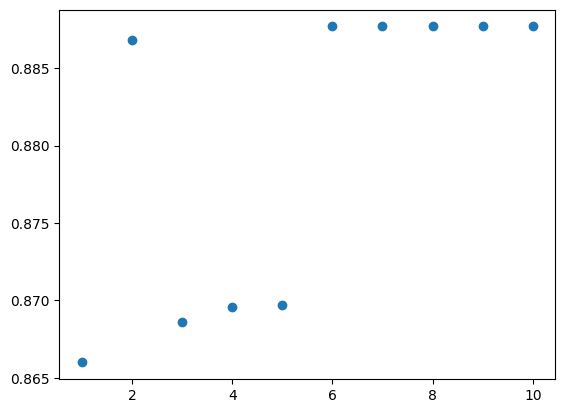

In [20]:
plt.scatter(range(1, 11), accuracies)
plt.show()